In [1]:
pip install tika

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32891 sha256=68b36a702deeaaecb6e8646d9f4bcd5ff8f71f9d284a51d7919e864df74b1c64
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [2]:
import numpy as np 
import pandas as pd
import os
from tika import parser 
import re

In [3]:
parsed_pdf = parser.from_file("/content/drive/MyDrive/AAAcolab data/resumes/Job description.pdf")
ref=" ".join(parsed_pdf['content'].strip().split('\n')[1:])
ref_df=pd.DataFrame({'resume':[ref]})

2021-09-07 23:34:12,907 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2021-09-07 23:34:14,043 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2021-09-07 23:34:14,366 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2021-09-07 23:34:19,373 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [4]:
 train_df = pd.DataFrame(columns = ['CandidateID', 'resume', 'cleaned_resume'])
for dirname, _, filenames in os.walk('/content/drive/MyDrive/AAAcolab data/resumes/trainResumes'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        raw = parser.from_file(path)
        train_df = train_df.append({'CandidateID' : filename[:-4], 'resume' : " ".join(raw['content'].strip().split('\n')[1:]), 'cleaned_resume' : ""}, 
                ignore_index = True)

In [5]:
test_df = pd.DataFrame(columns = ['CandidateID', 'resume', 'cleaned_resume'])
for dirname, _, filenames in os.walk('/content/drive/MyDrive/AAAcolab data/resumes/testResumes'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        raw = parser.from_file(path)
        test_df = test_df.append({'CandidateID' : filename[:-4], 'resume' : " ".join(raw['content'].strip().split('\n')[1:]), 'cleaned_resume' : ""}, 
                ignore_index = True)

In [6]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = resumeText.lower()
    return resumeText

In [7]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

In [8]:
ref_df['cleaned_resume'] = ref_df.resume.apply(lambda x: cleanResume(x))
ref_df['cleaned_resume']=ref_df['cleaned_resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print (ref_df['cleaned_resume'][0])

machine learning engineering 13585abc knowledge innovation ll focus researching building designing self running artificial intelligence ai systems automate predictive models responsible design create ai algorithms capable learning making predictions define machine learning ml experience qualifications bachelor s master s degree mention course requirement 0 2 years work experience providing analytics solutions commercial setting technical expertise machine learning clustering logistic regression classification different libraries scikit learn numpy pandas matplotlib seaborn deep learning frameworks tensorflow keras pytorch application neural networks models cnn rnn gans familiar natural language processing associated libraries like nltk spacy beautiful soup pyspark hadoop big data pipelines data science methodology exploratory data analysis feature engineering model selection deployment model scale model evaluation deploying nlp architectures computer vision models production considered

In [9]:
train_df['cleaned_resume'] = train_df.resume.apply(lambda x: cleanResume(x))
test_df['cleaned_resume'] = test_df.resume.apply(lambda x: cleanResume(x))

In [10]:
train_df['cleaned_resume']=train_df['cleaned_resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_df['cleaned_resume']=test_df['cleaned_resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [11]:
train_df

,CandidateID,resume,cleaned_resume
0,candidate_000,"JACOB SMITH F R E S H E R SKILLS Python, S...",jacob smith f r e s h e r skills python sql my...
1,candidate_001,Brianna Williams J U N I O R D E V E L O P ...,brianna williams j u n o r d e v e l o p e r e...
2,candidate_002,"AMZ Loans and Mortgages ERC Analytics, Jun 2...",amz loans mortgages erc analytics jun 2019 til...
3,candidate_003,P R O F I L E Extremely motivated to consta...,p r o f l e extremely motivated constantly dev...
4,candidate_006,JENNIFER ARMSTRONG P R O F I L E Fresher Co...,jennifer armstrong p r o f l e fresher compute...
...,...,...,...
85,candidate_144,BENJAMIN OSTA F R E S H E R D E V E L O P ...,benjamin osta f r e s h e r d e v e l o p e r ...
86,candidate_145,"Coca-COla Big Data Analyst, Nov 2019 to Til...",coca cola big data analyst nov 2019 till date ...
87,candidate_147,Jaroslav Chechnik F R E SHER Executive Prof...,jaroslav chechnik f r e sher executive profile...
88,candidate_148,P R O F I L E A data science professional w...,p r o f l e data science professional 1 years ...


In [12]:
test_df

,CandidateID,resume,cleaned_resume
0,candidate_004,O L I V I A S A N T O S CONSULTANT ANALYST ...,o l v s n t o s consultant analyst work experi...
1,candidate_005,ARMIN FITZGERALD D A T A M A N A G ...,armin fitzgerald d t m n g e r professional pr...
2,candidate_014,GRACE BAILRY M A C H I N E L E A R N I N G ...,grace bailry m c h n e l e r n n g d e v e l o...
3,candidate_016,A M E L I A M A R T I N DATA SCIENCE MAJOR ...,m e l m r t n data science major work experien...
4,candidate_017,P R O F I L E I am a Junior Machine Learnin...,p r o f l e junior machine learning developer ...
5,candidate_018,EVELYNN ADAMS G R A D U A T E F R E S H E ...,evelynn adams g r d u t e f r e s h e r profes...
6,candidate_019,JOSHUA WHITE A S S I S T A N T S O F T W A ...,joshua white s s s t n t s o f t w r e n d m c...
7,candidate_028,"ASI Technologies Intern, Dec 2020 - Ongoin...",asi technologies intern dec 2020 ongoing worki...
8,candidate_029,Eli Scott F R E SHER Executive Profile See...,eli scott f r e sher executive profile seeking...
9,candidate_031,P R O F I L E An avid explorer of analytics...,p r o f l e avid explorer analytics multiple f...


In [13]:
train = pd.read_csv("/content/drive/MyDrive/AAAcolab data/resumes/train.csv")
train.set_index('CandidateID',inplace=True)
train_df.set_index("CandidateID",inplace=True)

In [14]:
train = train.join(train_df)


In [15]:
ref_df['Match Percentage']=100
train=train.append(ref_df)

In [16]:
train['Match Percentage']=train['Match Percentage']/100
train

,Match Percentage,resume,cleaned_resume
candidate_011,0.1360,L I A M A N D R E W S FRESHER WORK EXPERIE...,l m n d r e w s fresher work experience intern...
candidate_113,0.3663,Ellie Mackey F R E S H E R I N T E R N Exe...,ellie mackey f r e s h e r n t e r n executive...
candidate_123,0.5493,"Telco Trainee Intern, May 2018 - Dec 2018 ...",telco trainee intern 2018 dec 2018 data handli...
candidate_012,0.4146,JIMMY GARTNER D A T A M A N A G E ...,jimmy ga ner d t m n g e r professional profil...
candidate_002,0.4891,"AMZ Loans and Mortgages ERC Analytics, Jun 2...",amz loans mortgages erc analytics jun 2019 til...
...,...,...,...
candidate_137,0.6018,SHAWN BUFFET D A T A P R O C E S S I N G ...,shawn buffet d t p r o c e s s n g n t e r n p...
candidate_072,0.4494,N A D I Y A A H M A D DATA ANALYST WORK EX...,n d y h m d data analyst work experience hsbc ...
candidate_140,0.1141,Stella Thatcher A S S O C I A T E M A R K E...,stella thatcher s s o c t e m r k e t n l y s ...
candidate_037,0.5670,N A O M I J A C K S O N JUNIOR SDE-MACHIN...,n o m j c k s o n junior sde machine learning ...


In [17]:
test_df.set_index("CandidateID",inplace=True)

In [18]:
traintest=train.append(test_df)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import ensemble

In [20]:
vectorizer = CountVectorizer(ngram_range=(1,2))
xfit= vectorizer.fit(traintest['cleaned_resume'])
x=vectorizer.transform(traintest['cleaned_resume'])
x=x.toarray()

In [21]:
print("Vocabulary size: {}".format(len(xfit.vocabulary_)))


Vocabulary size: 11797


In [22]:
bow=vectorizer.get_feature_names()
all=''
for word in bow:
  all +=' '+ word


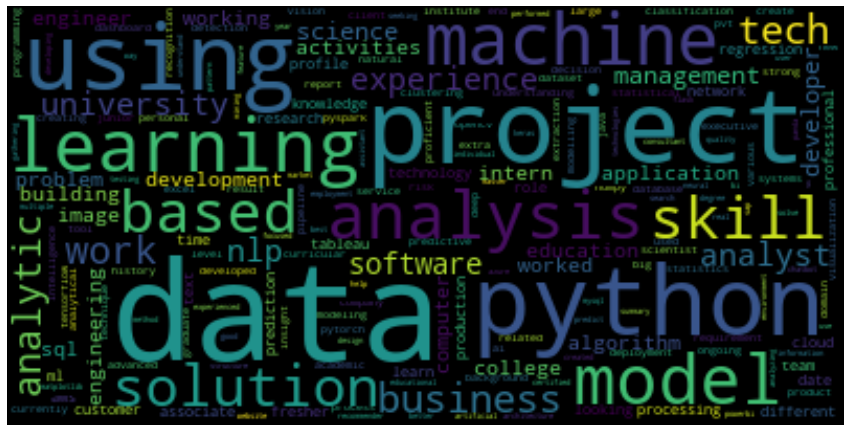

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color ='black').generate(all)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
xc_train=x[:91,]
xc_test=x[91:,]
y=train['Match Percentage']
xc_train.shape,y.shape,xc_test.shape

((91, 11797), (91,), (60, 11797))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(xc_train,y, test_size=0.2, random_state=0)

In [26]:
RFmodel = RandomForestRegressor(n_estimators=500,max_features='sqrt',random_state=1,n_jobs=-1)

In [27]:
RFmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [28]:
rfprediction=RFmodel.predict(X_test)

In [29]:
print("The r_2 score of the model is:",RFmodel.score(X_test,y_test))
train_error =  np.abs(y_test - rfprediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

The r_2 score of the model is: 0.1472829989691199
std_error:  0.137257984481346
mean_error:  0.11807166819548862
min_error:  0.007353679999999974
max_error:  0.5207658833333325


In [30]:
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_linear = SVR(kernel='linear')

In [31]:
svr_rbf.fit(X_train, y_train)
svrprediction=svr_rbf.predict(X_test)

In [32]:
print("The r_2 score of the model is:",svr_rbf.score(X_test,y_test))
train_error =  np.abs(y_test - svrprediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

The r_2 score of the model is: -0.1595559902316892
std_error:  0.14123417912512232
mean_error:  0.15693716431509452
min_error:  0.00044489799706193267
max_error:  0.645855101999955


In [33]:
gbmodel = ensemble.GradientBoostingRegressor(n_estimators=1500, learning_rate=0.01,loss='huber', random_state=5)

In [34]:
gbmodel.fit(X_train, y_train)
gbprediction=gbmodel.predict(X_test)

In [35]:
print("The r_2 score of the model is:",gbmodel.score(X_test,y_test))
train_error =  np.abs(y_test - gbprediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

The r_2 score of the model is: 0.4007293198640933
std_error:  0.110239350219616
mean_error:  0.10433033565139001
min_error:  8.329683568952806e-05
max_error:  0.40608217806259983


In [36]:
knnmodel=KNeighborsRegressor(n_neighbors=3, p=2,weights= 'distance',leaf_size=50, metric_params=None, n_jobs=-1,)

In [37]:
knnmodel.fit(X_train,y_train)
knnpred=knnmodel.predict(X_test)

In [38]:
print("The r_2 score of the model is:",knnmodel.score(X_test,y_test))
train_error =  np.abs(y_test - knnpred)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

The r_2 score of the model is: 0.4334062844784068
std_error:  0.10869462210670833
mean_error:  0.09983398400135196
min_error:  0.004738833031431855
max_error:  0.5071373460300332


In [39]:
knnmodel.fit(xc_train,y)


KNeighborsRegressor(algorithm='auto', leaf_size=50, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='distance')

In [40]:
yc_pred=knnmodel.predict(xc_test)

In [41]:
yc_pred

array([0.15761761, 0.4553621 , 0.17425899, 0.33463393, 0.46836388,
       0.27575474, 0.52370529, 0.27795682, 0.27664136, 0.4803216 ,
       0.46602938, 0.39211864, 0.29287831, 0.18368789, 0.17758387,
       0.17450264, 0.47838608, 0.2891587 , 0.27698922, 0.47104242,
       0.50465554, 0.29328318, 0.32398581, 0.31824709, 0.30730163,
       0.30098598, 0.49913451, 0.46528362, 0.29567288, 0.29268197,
       0.53327669, 0.17580122, 0.29346004, 0.47161373, 0.27808262,
       0.27855308, 0.27886772, 0.29320633, 0.07972498, 0.39230528,
       0.30170973, 0.18119456, 0.5190181 , 0.17977515, 0.18079203,
       0.48038029, 0.333955  , 0.43466628, 0.51888671, 0.42137578,
       0.30199514, 0.36570311, 0.4645    , 0.3178082 , 0.15182319,
       0.37596153, 0.37392985, 0.17671995, 0.36934444, 0.38830053])

In [42]:
yc_pred=100*yc_pred

In [43]:
newdf=pd.DataFrame({'CandidateID':test_df.index,'Match Percentage':yc_pred})

In [44]:
pred_df=pd.read_csv('/content/drive/MyDrive/AAAcolab data/resumes/test.csv')

In [45]:
pred_df=pred_df.merge(newdf)

In [46]:
pred_df.to_csv('/content/drive/MyDrive/AAAcolab data/resumes/OP/test.csv',index=False)